In [145]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [146]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # convert image to gray
        #img = Image.open(filename).convert('L')
        #img.save(filename)
        # load an image from file
        image = load_img(filename, target_size=(160, 128))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = round(float(name.split('_')[0].split('-')[0]) / float(name.split('_')[0].split('-')[1]), 1)
        if value <= 0.5:
            value = 0
        elif value <= 0.9:
            value = 1
        elif value > 0.9 and value < 1.1:
            value = 2
        elif value >= 1.1 and value < 1.5:
            value = 3
        elif value >= 1.5:
            value = 4
        labels.append(value)
        images.append(image)
    return images, labels

In [147]:
# load images from both train and test groups
directory = '../data/Patate_Pics/Training'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../data/Patate_Pics/Validation'
images_val, labels_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 896
Loaded Images and labels for validation: 150


In [148]:
#normalise datas
images = np.array(images)
images_val = np.array(images_val)

In [149]:
#convert to np.array
labels = np.array(labels)
labels_val = np.array(labels_val)

In [150]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)

In [151]:
labelsd.shape
labelsd

,0,1,2,3,4
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0
5,1,0,0,0,0
6,1,0,0,0,0
7,0,1,0,0,0
8,1,0,0,0,0
9,0,1,0,0,0


In [152]:
#convert to np.array again
labelsd = np.array(labelsd)

In [153]:
#check if OK
labels[1], labelsd[1]

(1, array([0, 1, 0, 0, 0], dtype=uint8))

In [154]:
from keras.models import Model
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [155]:
K.clear_session()

img_in = Input(shape=(160, 128, 3), name='img_in')

x = img_in

x = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

#x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
#x = MaxPooling2D(pool_size=(2, 2))(x)

flat = Flatten()(x)

out = Dense(5, activation='softmax')(flat)

model = Model(inputs=[img_in], outputs=[out])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [156]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 160, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 128, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 16, 32)        0         
__________

In [157]:
h = model.fit(images, labelsd, batch_size=1, epochs=20, verbose=1)

Epoch 1/20
896/896 [==============================] - 12s - loss: 4.5663 - acc: 0.4353    
Epoch 2/20
896/896 [==============================] - 12s - loss: 0.9498 - acc: 0.6429    
Epoch 3/20
896/896 [==============================] - 12s - loss: 0.7594 - acc: 0.7199    
Epoch 4/20
896/896 [==============================] - 12s - loss: 0.6430 - acc: 0.7645    
Epoch 5/20
896/896 [==============================] - 12s - loss: 0.5339 - acc: 0.8092    
Epoch 6/20
896/896 [==============================] - 12s - loss: 0.4271 - acc: 0.8616    
Epoch 7/20
896/896 [==============================] - 12s - loss: 0.3245 - acc: 0.8917    
Epoch 8/20
896/896 [==============================] - 13s - loss: 0.2257 - acc: 0.9275    
Epoch 9/20
896/896 [==============================] - 14s - loss: 0.1416 - acc: 0.9621    
Epoch 10/20
896/896 [==============================] - 17s - loss: 0.0882 - acc: 0.9788    
Epoch 11/20
896/896 [==============================] - 21s - loss: 0.0511 - acc: 0.9866  

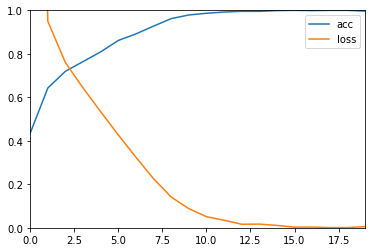

In [158]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [159]:
# Get predictions
all_preds = model.predict(images_val)

# Check predictions
idx = np.argmax(all_preds, axis=1)

i = 0
for value in idx:
    idx[i] = value
    i = i + 1

idx, labels_val

(array([3, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 3,
        1, 1, 3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 3, 3, 2, 1, 1, 2, 3, 3, 1, 1, 3,
        2, 2, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1,
        3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 2, 2, 1, 2, 1, 3, 3, 3, 2, 3, 3, 3,
        3, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 2, 3, 3, 3, 3, 2,
        3, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 3, 1, 1, 3, 1, 2, 2, 3, 2, 2, 1, 1,
        3, 1, 2, 3, 3, 2, 3, 2, 3, 4, 3, 2], dtype=int64),
 array([4, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 4, 3, 3, 2, 2, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 3,
        3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 

In [160]:
import math
i = 0
res = 0
for value in idx:
    res += ((value - labels_val[i])*(value - labels_val[i]))
    i = i + 1
math.sqrt(res)/len(idx)

0.07393691004272945

In [161]:
model.save('model-1x5.h5')

In [ ]:
from keras.models import load_model
model = load_model('test_model.h5')